# Sklearn
Материал взят из репозитория https://github.com/emeli-dral/sklearn_intro

## sklearn.linear_model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных

In [3]:
data, target, coef = datasets.make_regression(n_features=2,
                                              n_informative=1,
                                              n_targets=1, 
                                              noise=5.,
                                              coef=True,
                                              random_state=2)

In [4]:
print('Ground truth coefficients', coef)

Ground truth coefficients [38.07925837  0.        ]


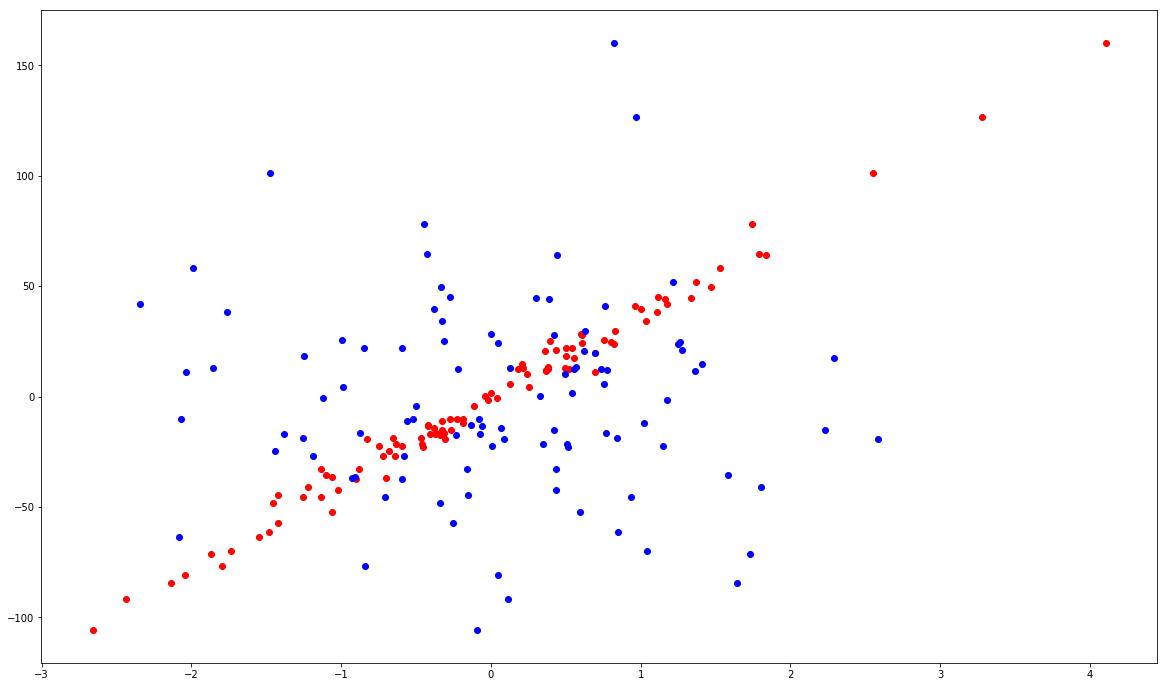

In [5]:
plt.figure(figsize=(20, 12))
pylab.scatter(list(map(lambda x: x[0], data)), target, color='r')
pylab.scatter(list(map(lambda x: x[1], data)), target, color='b')

In [6]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data,
                                                                                    target,  
                                                                                    test_size=0.3)

#### LinearRegression

In [7]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

/Users/stleznev/py_envs/dmia2018env/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [8]:
?linear_model.SGDRegressor

In [9]:
print(test_labels)

[  39.70663436  -80.80239408  -16.65927231  -36.69728864  -27.02798161
  -21.48288019  -22.33224966   64.70214251  -45.27502383  -35.32062686
  -63.4056294    -1.42235396  -11.18242389 -105.77758163    1.72644759
  -13.26392817  -24.77820218  -19.36956003  -17.27897399   34.35183007
  -61.47026695   44.66274342  -84.32102748   51.87072011   20.87713077
  -16.85466265   12.67156468    5.86887774  -19.16792315  -32.71074998]


In [10]:
print(predictions)

[  37.72318049  -79.00593406  -14.74503103  -27.58185995  -25.26926646
  -24.97437393  -29.37456571   68.1427633   -48.76781076  -42.68152498
  -60.27457271   -1.26384726  -13.19715713 -102.79753091   -0.59615757
  -16.66545061  -26.83303416  -32.48706216  -13.69156083   38.98312454
  -57.49677014   50.66902457  -82.51809089   51.98271935   13.20413017
  -16.31281078   13.93423357    4.22000061  -12.05710911  -44.12502051]


In [11]:
metrics.mean_absolute_error(test_labels, predictions)

4.011404271315409

In [12]:
linear_scoring = model_selection.cross_val_score(linear_regressor,
                                                 data,
                                                 target,
                                                 scoring='neg_mean_absolute_error', 
                                                 cv=10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: -4.070071498779699, std: 1.073710449289018


In [13]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=True)

In [14]:
linear_scoring = model_selection.cross_val_score(linear_regressor,
                                                 data,
                                                 target,
                                                 scoring=scorer, 
                                                 cv=10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 4.070071498779699, std: 1.073710449289018


In [15]:
coef

array([38.07925837,  0.        ])

In [16]:
print('Intercept', linear_regressor.intercept_)
print('Coefficients', linear_regressor.coef_)

Intercept -0.6542893333398743
Coefficients [38.40400209  0.10649325]


In [17]:
print("y = 0.0 + {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 0.0 + 38.08*x1 + 0.00*x2


In [18]:
print("y = {:.2f} + {:.2f}*x1 + {:.2f}*x2".format(linear_regressor.intercept_,
                                                 linear_regressor.coef_[0],
                                                 linear_regressor.coef_[1]))

y = -0.65 + 38.40*x1 + 0.11*x2


#### Lasso

In [19]:
lasso_regressor = linear_model.Lasso(random_state=3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [20]:
lasso_scoring = model_selection.cross_val_score(lasso_regressor,
                                                data,
                                                target,
                                                scoring=scorer,
                                                cv=10)
print('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 4.154478246666396, std: 1.0170354384993354


In [21]:
print('Intercept', lasso_regressor.intercept_)
print('Coefficients', lasso_regressor.coef_)

Intercept -0.5507804927002082
Coefficients [37.61544043  0.        ]


In [22]:
print("y = 0.0 + {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 0.0 + 38.08*x1 + 0.00*x2


In [23]:
print("y = {:.2f} + {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.intercept_,
                                                  lasso_regressor.coef_[0],
                                                  lasso_regressor.coef_[1]))

y = -0.55 + 37.62*x1 + 0.00*x2


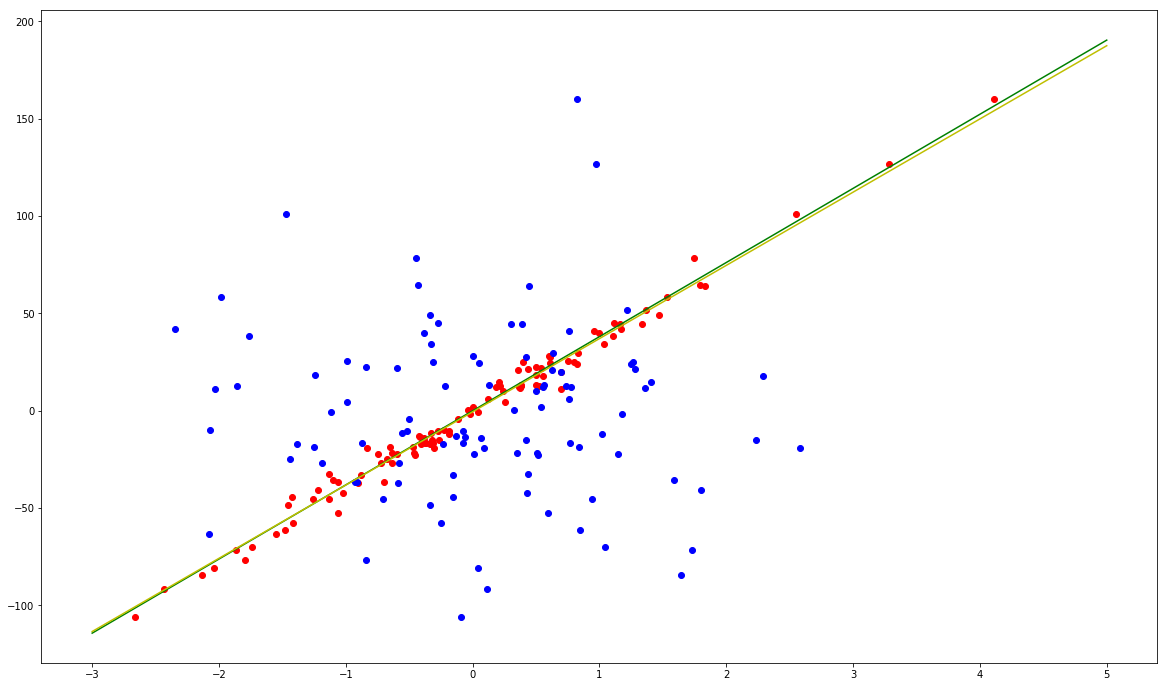

In [24]:
plt.figure(figsize=(20, 12))
pylab.scatter(list(map(lambda x: x[0], data)), target, color='r')
pylab.scatter(list(map(lambda x: x[1], data)), target, color='b')

x_points = np.linspace(-3, 5)
y_points_gt = x_points * coef[0]
y_points_lasso = (x_points * lasso_regressor.coef_[0]
                  + lasso_regressor.intercept_)
plt.plot(x_points, y_points_gt, c='g')
plt.plot(x_points, y_points_lasso, c='y')